In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
import os

In [120]:
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

--2019-01-05 07:03:07--  https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311442766 (297M) [application/zip]
Saving to: ‘flower_data.zip.1’

flower_data.zip.1     5%[>                   ]  14.97M   917KB/s    eta 5m 47s ^C


In [121]:
!7z x flower_data.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 311442766 bytes (298 MiB)

Extracting archive: flower_data.zip
 54% 4096 Op            --
Path = flower_data.zip
Type = zip
Physical Size = 311442766

      6% 522 - flower_data/valid/65/image_03222.jp                                               12% 1040 - flower_data/train/95/image_07478.j                                               18% 1501 - flower_data/train/102/image_08017.jp                                                 25% 2042 - flower_data/train/94/image_07405.j                                               33% 2571 - flower_data/train/7/image_07225.jp                                               40% 3104 - flower_data/train/87/image_05495.j                                               47% 3650 - flower_data/train/8/im

In [3]:
path = Path('flower_data')

In [4]:
path.ls()

[PosixPath('flower_data/.ipynb_checkpoints'),
 PosixPath('flower_data/model.pt'),
 PosixPath('flower_data/models'),
 PosixPath('flower_data/train'),
 PosixPath('flower_data/valid'),
 PosixPath('flower_data/cat_to_name.json')]

In [5]:
dump = path/'train'

In [6]:
dump.ls()

[PosixPath('flower_data/train/87'),
 PosixPath('flower_data/train/83'),
 PosixPath('flower_data/train/48'),
 PosixPath('flower_data/train/74'),
 PosixPath('flower_data/train/98'),
 PosixPath('flower_data/train/77'),
 PosixPath('flower_data/train/100'),
 PosixPath('flower_data/train/96'),
 PosixPath('flower_data/train/39'),
 PosixPath('flower_data/train/51'),
 PosixPath('flower_data/train/9'),
 PosixPath('flower_data/train/65'),
 PosixPath('flower_data/train/26'),
 PosixPath('flower_data/train/94'),
 PosixPath('flower_data/train/17'),
 PosixPath('flower_data/train/8'),
 PosixPath('flower_data/train/5'),
 PosixPath('flower_data/train/13'),
 PosixPath('flower_data/train/71'),
 PosixPath('flower_data/train/41'),
 PosixPath('flower_data/train/3'),
 PosixPath('flower_data/train/66'),
 PosixPath('flower_data/train/58'),
 PosixPath('flower_data/train/22'),
 PosixPath('flower_data/train/84'),
 PosixPath('flower_data/train/90'),
 PosixPath('flower_data/train/92'),
 PosixPath('flower_data/train/3

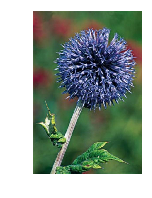

In [7]:
img = open_image(dump/'10'/'image_07088.jpg')
img.show()

In [6]:
df = pd.read_json(path/'cat_to_name.json', typ='series')
df.head(10)

21                   fire lily
3             canterbury bells
45            bolero deep blue
1                pink primrose
34               mexican aster
27    prince of wales feathers
7                  moon orchid
16                globe-flower
25              grape hyacinth
26                  corn poppy
dtype: object

In [9]:
df[1]

'pink primrose'

In [12]:
type(df)
labels = array(df, dtype=object)
labels

array(['fire lily', 'canterbury bells', 'bolero deep blue', 'pink primrose', ..., 'water lily', 'wallflower',
       'passion flower', 'petunia'], dtype=object)

In [13]:
type((path/'train').ls())

list

In [15]:
dump = ['train','valid']
for i in dump:
    
    # Renaming files and moving in 'train' folder
    for filename in os.listdir(path/i):
        j=0
        for file in os.listdir(path/i/filename):
            #print(file, filename)
            src = path/i/filename/file
            new_name = df[int(filename)]+str(j)+'.jpg'
            j+=1
            dst = path/i/new_name
            #print(dst, filename)
            os.rename(src,dst)
            
    # Deleting the folders        
    folders = [str(x) for x in range(1,103)]
    for filename in os.listdir(path/i):
        if filename in folders:
            os.rmdir(path/i/filename)

In [21]:
length=0
for i in os.listdir(path/'train'):
    length+=1
length

6552

In [7]:
def label_func(name):
    # name -> flower_data/train/bougainvillea83.jpg
    n = str(name).split('/')[-1]
    oi = n.split('.')[0]
    i=0
    while oi[i] not in [str(x) for x in range(0,103)]:
        i+=1
    return oi[:i]     

In [8]:
data_lm = (ImageItemList.from_folder(path)
           .split_by_folder()
           .label_from_func(func=label_func)
           .transform(get_transforms(), size=224)
           .databunch()
           .normalize(imagenet_stats))

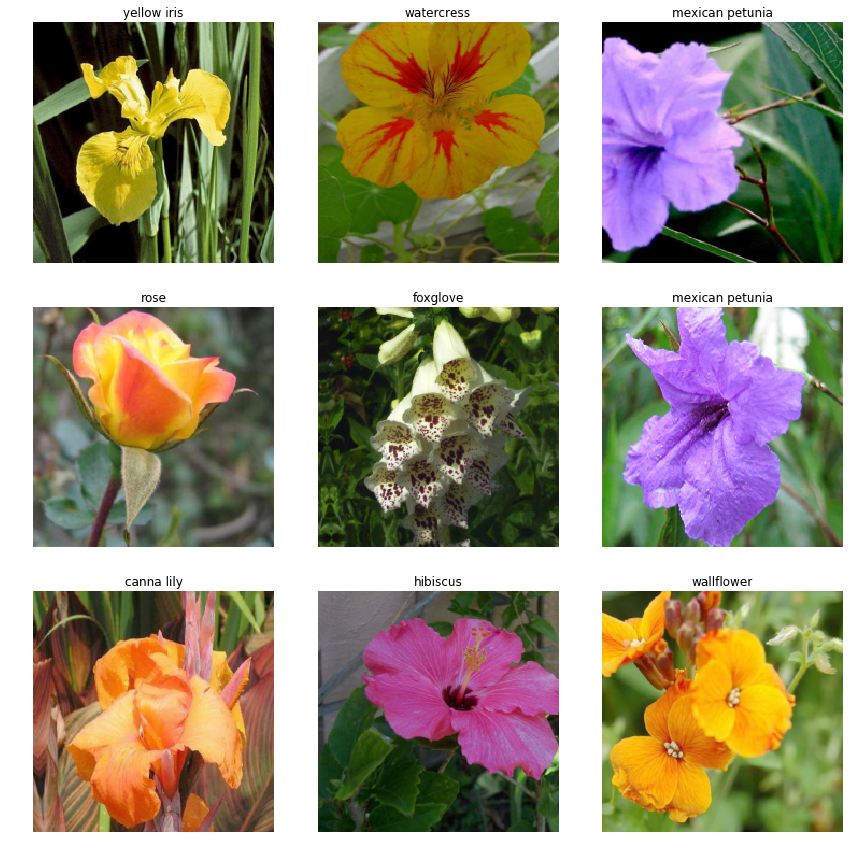

In [10]:
data_lm.show_batch(rows=3)

In [12]:
print(data_lm.classes)

['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'ora

In [11]:
learn  = create_cnn(data_lm, models.resnet34, metrics=[accuracy,error_rate])

In [122]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


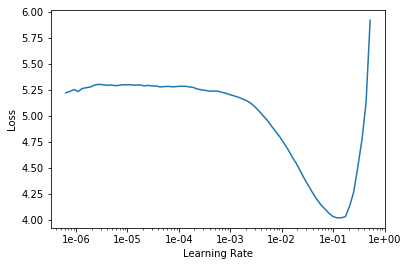

In [123]:
learn.recorder.plot()

In [124]:
learn.fit_one_cycle(10, slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy,error_rate
1,5.242153,4.804075,0.011002,0.988998
2,4.946548,4.345411,0.061125,0.938875
3,4.386636,3.616185,0.279951,0.720049
4,3.694824,2.984445,0.462103,0.537897
5,3.157420,2.532223,0.548900,0.451100
6,2.808334,2.230313,0.608802,0.391198
7,2.515486,2.056755,0.630807,0.369193
8,2.409547,1.964324,0.656479,0.343521
9,2.320257,1.921432,0.661369,0.338631
10,2.314698,1.916960,0.660147,0.339853


In [125]:
learn.save('first')

In [126]:
learn.load('first');

In [127]:
learn.unfreeze()

In [128]:
learn.fit_one_cycle(15, slice(1e-06,1e-04))

epoch,train_loss,valid_loss,accuracy,error_rate
1,2.257703,1.852011,0.682152,0.317848
2,2.117291,1.663840,0.718826,0.281174
3,1.871990,1.365195,0.765281,0.234719
4,1.540492,1.047381,0.810513,0.189487
5,1.233102,0.797940,0.871638,0.128362
6,0.940529,0.612489,0.899755,0.100244
7,0.753261,0.488939,0.925428,0.074572
8,0.594690,0.413888,0.931540,0.068460
9,0.501067,0.355412,0.941320,0.058680
10,0.438348,0.320493,0.943765,0.056235


In [129]:
learn.save('second')

In [12]:
learn.load('second');

In [14]:
torch.save(learn.model.state_dict(), path/'state_dict.pth')

In [16]:
dictoi = torch.load(path/'state_dict.pth')

In [17]:
learn.model.load_state_dict(dictoi)

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate
1,0.252716,0.181688,0.953545,0.046455


In [19]:
learn.save('third')